#### The Empirical Rule and Normal Distribution

In week 2, we discussed the empirical rule or the 68 - 95 - 99.7 rule, which describes how many observations fall within a certain distance from our mean. This "rule" applies to normally distributed populations.

To understand the empirical rule it is important to understand the meaning of the "standard deviation". The standard deviation, or SD, is often denoted  𝜎 (sigma). For any distribution, the standard deviation is the "typical" distance of a single randomly selected value from the mean. To be precise, the standard deviation is defined to be the square root of the average squared distance of an observation from the mean. Since this definition involves squaring, and then taking a square root, the standard deviation has the same units as the data (e.g. if the data are measured in centimeters, then the SD has units of centimeters as well).

The following graph displays a normal density curve with the central intervals denoted along with their corresponding percentages:

<img src='three_sigma_rule.png'>

For this tutorial, we will be exploring the number of hours that college students sleep.

The example used in lecture stated that the sleep duration had a mean of 7 hours and standard deviation of 1.7 hours; we will use these same values and treat the distribution as being normal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1738)

Below we generate a large sample of data from a normal population with the desired mean and standard deviation.

In [2]:
mu = 7 # The population mean
sigma = 1.7 # The population standard deviation 

# Generate a large set of random observations
Observations = np.random.normal(mu, sigma, size=100000)

Next we generate an "empirical" version of the plot above, based on simulated data instead of based on the theoretical normal population. Since we have a very large sample, the figures below and above are very similar to each other.

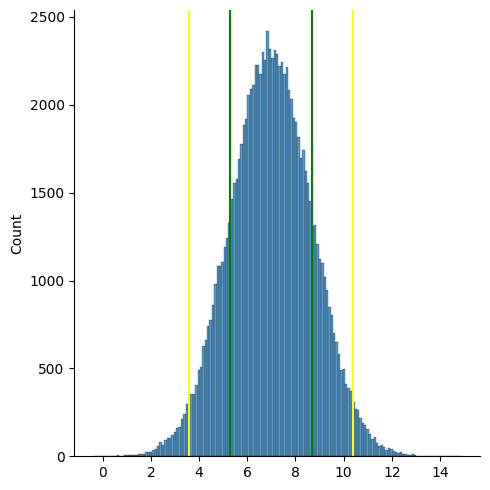

In [3]:
sns.displot(Observations)

plt.axvline(np.mean(Observations)-np.std(Observations), color = 'green')
plt.axvline(np.mean(Observations)+np.std(Observations), color = 'green')

plt.axvline(np.mean(Observations)-(2*np.std(Observations)), color = 'yellow')
plt.axvline(np.mean(Observations)+(2*np.std(Observations)), color = 'yellow')

Below we use Pandas to obtain a set of descriptive statistics for the data generated above. As expected, the sample mean is close to but not equal to the population mean, and the sample SD (denoted std below) is close to but not equal to the population SD

In [4]:
pd.Series(Observations).describe()

count    100000.000000
mean          6.992853
std           1.704479
min          -0.412972
25%           5.848168
50%           6.984680
75%           8.141981
max          14.893770
dtype: float64

Next we randomly subsample from the large set of data generated above.

In [5]:
SampleA = np.random.choice(Observations, size=400)
SampleB = np.random.choice(Observations, size=400)
SampleC = np.random.choice(Observations, size=400)

The histograms of the samples resemble normal distributions

<Axes: ylabel='Count'>

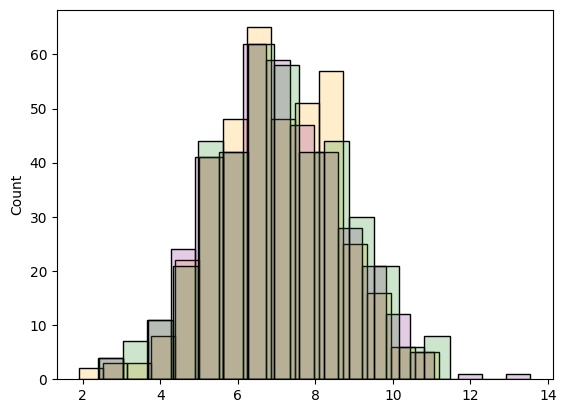

In [6]:
fig, ax = plt.subplots()

sns.histplot(SampleA, ax = ax, color = 'Orange', alpha=0.2)
sns.histplot(SampleB, ax = ax, color = 'Purple', alpha=0.2)
sns.histplot(SampleC, ax = ax, color = 'Green', alpha=0.2)

Approximately 68% of each sample falls within one standard deviation of the mean:

In [7]:
print((np.abs(SampleA - mu) < 1 * sigma).mean())
print((np.abs(SampleB - mu) < 1 * sigma).mean())
print((np.abs(SampleC - mu) < 1 * sigma).mean())

0.73
0.685
0.6625


Now consider a population that is not normal. For example, we can sample from the standard exponential distribution, which has mean 1 and standard deviation 1.

In [8]:
expdata = np.random.exponential(size=1000)
print((np.abs(expdata - 1) < 1).mean())
print((np.abs(expdata - 1) < 2).mean())

0.86
0.94


We see that a far greater fraction of the data fall within 1 standard deviation of the mean compared to the empirical rule (86% versus 68%).

The Student t distribution with three degrees of freedom has mean 0 and variance 3, so the standard deviation is √3 ≈1.73.

In [9]:
tdata = np.random.standard_t(3, size=1000)
print((np.abs(tdata) < np.sqrt(3)).mean())
print((np.abs(tdata) < 2*np.sqrt(3)).mean())

0.803
0.953


Again, a far greater fraction of the data fall within one standard deviation of the mean than would occur under the empirical rule.

Now that we have covered the 68 - 95 - 99.7 rule, we will take this a step further and discuss the empirical distribution function.

The empirical distribution function is a cumulative density function that gives the proportion of observations that are less than or equal to a given value.

Let's use the initial image above as an example of this concept:

<img src="three_sigma_rule.png">

Now, by using our observations for hours of sleep, we can create an empirical distribution function in Python that estimates the population proportion of observations falling below a given number of hours of sleep.

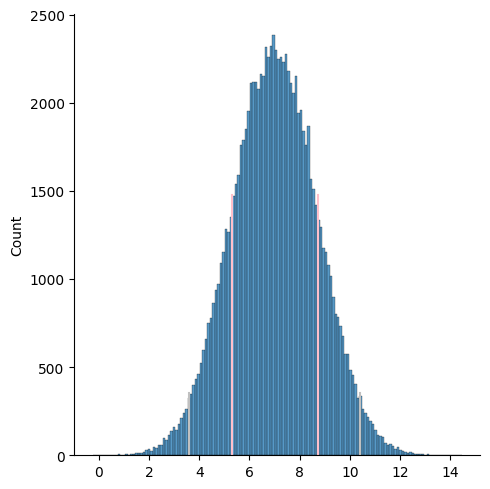

In [22]:
mu = 7
sigma = 1.7

Observations = [np.random.normal(mu, sigma) for _ in range(100000)]

sns.displot(Observations)
plt.axvline((np.mean(Observations)-np.std(Observations)), 0, 0.59, color = 'pink')
plt.axvline((np.mean(Observations)+np.std(Observations)), 0, 0.59, color = 'pink')

plt.axvline((np.mean(Observations)-(2*np.std(Observations))), 0, 0.14, color = 'silver')
plt.axvline((np.mean(Observations)+(2*np.std(Observations))), 0, 0.14, color = 'silver')

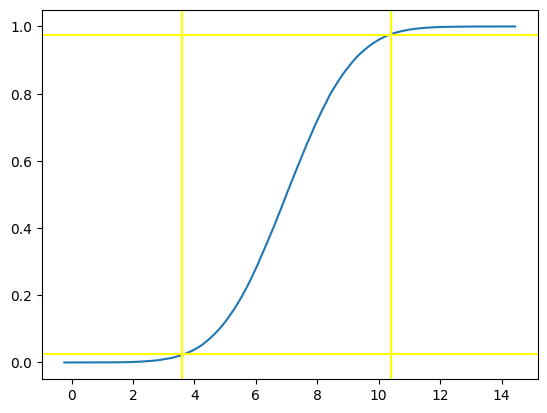

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

ecdf = ECDF(Observations)

plt.plot(ecdf.x, ecdf.y)

plt.axhline(y=0.025, color = 'yellow')
plt.axhline(y=0.975, color = 'yellow')

plt.axvline((np.mean(Observations)-(2*np.std(Observations))), color = 'yellow')
plt.axvline((np.mean(Observations)+(2*np.std(Observations))), color = 'yellow')